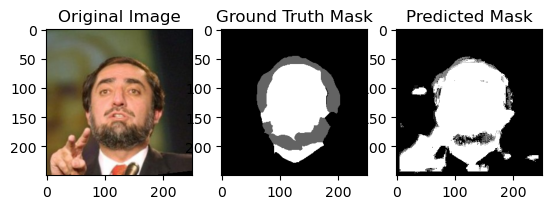

In [2]:
import torch
from PIL import Image
from io import BytesIO
import requests
import torchvision
from dataset import LFWDataset
import numpy as np
import matplotlib.pyplot as plt

my_model = torch.jit.load("scripted_unet.pt")
lfw_dataset = LFWDataset(download=False, base_folder='..\cvdl_lab_4\lfw_dataset', transforms=None)
index_to_inspect = 10
image, mask = lfw_dataset[index_to_inspect]
image_tensor = torch.unsqueeze(torch.transpose(torch.tensor(image), 0, 2), 0).float()

with torch.no_grad():
    output = my_model(image_tensor)

predicted_mask = torch.argmax(output, dim=1).squeeze().numpy()
predicted_mask_rotated = np.rot90(predicted_mask, k=-1)
predicted_mask_final = np.fliplr(predicted_mask_rotated)

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Ground Truth Mask')

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_final, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [3]:
import gradio as gr
import numpy as np
from PIL import Image

def segment_image(input_image):
    image_array = np.array(input_image)
    image_tensor = torch.unsqueeze(torch.transpose(torch.tensor(input_image), 0, 2), 0).float()
    
    with torch.no_grad():
        output = my_model(image_tensor)

    predicted_mask = torch.argmax(output, dim=1).squeeze().numpy()
    predicted_mask_rotated = np.rot90(predicted_mask, k=-1)
    predicted_mask_final = np.fliplr(predicted_mask_rotated)
    
    predicted_mask_final = (predicted_mask_final * 255).astype(np.uint8)
    return predicted_mask_final

# Gradio Interface
ui = gr.Interface(
    fn=segment_image, 
    inputs=gr.Image(),
    outputs=gr.Image(),
    examples=['celeb_inputs/celeb1.jpg', 
              'celeb_inputs/celeb2.jpg', 
              'celeb_inputs/celeb3.jpg',
              'celeb_inputs/celeb4.jpg',
              'celeb_inputs/celeb5.jpg']
)

# Launch the Gradio Interface
ui.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


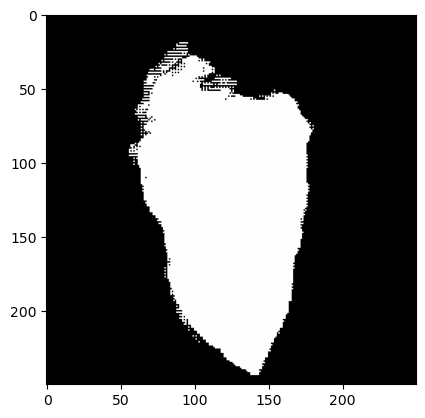

In [38]:
celeb = Image.open('celeb1.jpg').convert('RGB')
celeb = np.array(celeb)
img = segment_image(celeb)
plt.imshow(img, cmap='gray')

In [1]:
import torch
torch.cuda.is_available()

False